In [23]:
#import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

#Read in file path
cancer_path=Path('Resources/cancer_reg.csv')

#Convert the CSV to Dataframe
cancer_df=pd.read_csv(cancer_path,encoding="ISO-8859-1")

cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [24]:
#Update the column headers to be more readable.
cancer_df[["County","State"]]=cancer_df["Geography"].str.split(",",expand=True)
cancer_reorg_df=cancer_df.rename(columns={"County":"County","State":"State","avgAnnCount":"Cancer_Incidence_Count",
                                          "avgDeathsPerYear":"Average_Deaths_per_Year","Geography":"County_State",
                                          "popEst2015":"Population_Estimate_2015","MedianAge":"Median_Age",
                                          "MedianAgeMale":"Median_Age_Male","MedianAgeFemale":"Median_Age_Female",
                                          "medIncome":"Median_Income","povertyPercent":"Poverty_Rate",
                                          "AvgHouseholdSize":"Average_Household_Size","PercentMarried":"Percent_of_Population_Married",
                                          "PctEmployed16_Over":"Percent_Employed_Over_16","PctUnemployed16_Over":"Percent_Unemployed_Over_16",
                                          "PctPrivateCoverage":"Private_Insurance_%","PctPublicCoverage"
                                          :"Public_Insurance_%","PctWhite":"Pop_Percent_White","PctBlack":"Pop_Percent_Black",
                                          "PctAsian":"Pop_Percent_Asian","PctOtherRace":"Pop_Percent_Other_Race"})
final_cancer_df=cancer_reorg_df[["County","State","Cancer_Incidence_Count","Average_Deaths_per_Year",
                                 "Median_Income","Population_Estimate_2015","Poverty_Rate","Percent_of_Population_Married","Percent_Employed_Over_16","Percent_Unemployed_Over_16",
                                 "Median_Age","Median_Age_Male","Median_Age_Female","Public_Insurance_%",
                                 "Private_Insurance_%","Pop_Percent_White","Pop_Percent_Black","Pop_Percent_Asian","Pop_Percent_Other_Race"]]

In [25]:
final_cancer_df.to_csv("Resources/cancer_dataset.csv",index=False,encoding="ISO-8859-1")

In [26]:
#Load CSV and create a dataframe
f = 'Resources\\cancer_dataset.csv'
cancer_df = pd.read_csv(f,encoding = "ISO-8859-1")

#Converting three columns to integars for calculations.
cancer_df=cancer_df.astype({"Percent_of_Population_Married":int,"Average_Deaths_per_Year":int,"Population_Estimate_2015":int})

#Creating new column called Percent Cancer Deaths.
cancer_df["Cancer_Deaths_Percent"]=(cancer_df["Average_Deaths_per_Year"]/cancer_df["Cancer_Incidence_Count"])*100

Cody's Code

In [27]:
#Create a new dataframe with the columns state, Cancer_Incidence_Count,Percent_Unemployed_Over_16 . 
unemployment_df=cancer_df.loc[:,["Cancer_Incidence_Count","Percent_Unemployed_Over_16","State"]]

#Create a new dataframe that shows the totals by state for Cancer Incidence and Average unemployment percentage. 
totals_df = unemployment_df.groupby('State').agg({'Cancer_Incidence_Count': 'sum'})

# Print the totals for each state
totals_df

,Cancer_Incidence_Count
State,
Alabama,24182.000000
Alaska,2512.000000
Arizona,27051.000000
Arkansas,14762.000000
California,156982.000000
Colorado,21001.000000
Connecticut,20304.000000
Delaware,5167.000000
District of Columbia,2881.000000


In [28]:
# Create a dataframe that displays the mean unemployment percentage by state. 
grouped_df = unemployment_df.groupby('State')

# Calculate the sum and mean for each group
mean_values = grouped_df['Percent_Unemployed_Over_16'].mean()
sum_values = grouped_df['Cancer_Incidence_Count'].sum()

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Cancer Incidence Count':sum_values,
    'Average Unemployment Percentage': mean_values})

# Display the result DataFrame
result_df

,Cancer Incidence Count,Average Unemployment Percentage
State,,
Alabama,24182.000000,11.071429
Alaska,2512.000000,9.900000
Arizona,27051.000000,11.966667
Arkansas,14762.000000,8.982667
California,156982.000000,10.801754
Colorado,21001.000000,7.621667
Connecticut,20304.000000,8.162500
Delaware,5167.000000,7.933333
District of Columbia,2881.000000,9.600000


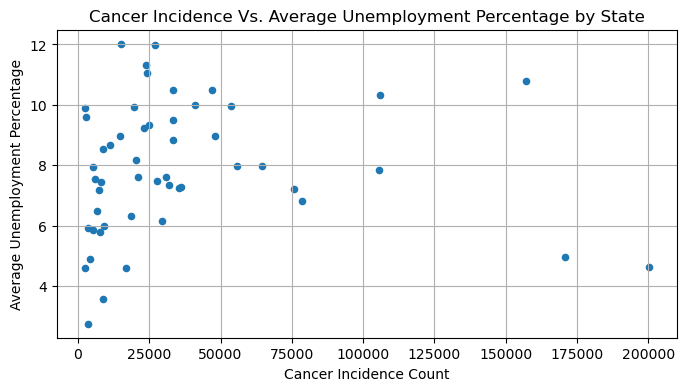

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a scatterplot that displays the correlation between the average unemployment percentage and cancer incidence by state
result_df.plot(kind="scatter", x="Cancer Incidence Count", y="Average Unemployment Percentage", grid=True, figsize=(8,4),
              title="Cancer Incidence Vs. Average Unemployment Percentage by State")
plt.show()
plt.savefig("Images/Unemployment_Cancer.png")

In [30]:
#Create a new dataframe with the columns avgDeathsPerYear,State PctWhite, PctBlack, PctAsian, and PctOtherRace. 
working1_df=cancer_df.loc[:,["Cancer_Incidence_Count","Average_Deaths_per_Year","State"]]
working1_df

,Cancer_Incidence_Count,Average_Deaths_per_Year,State
0,1397.000000,469,Washington
1,173.000000,70,Washington
2,102.000000,50,Washington
3,427.000000,202,Washington
4,57.000000,26,Washington
...,...,...,...
3042,1962.667684,15,Kansas
3043,1962.667684,43,Kansas
3044,1962.667684,46,Kansas
3045,1962.667684,52,Kansas


In [31]:
unique_values1 = working1_df['State'].unique()

new_df = pd.DataFrame({'State': unique_values1})
new_df

,State
0,Washington
1,West Virginia
2,Wisconsin
3,Nebraska
4,Nevada
5,New Hampshire
6,New Jersey
7,New Mexico
8,New York
9,Virginia


In [32]:
#Create a new dataframe that shows the totals by state for Cancer Incidence and Average Deaths per year. 
grouped_cancer_df = working1_df.groupby('State').agg({'Cancer_Incidence_Count': 'sum', 'Average_Deaths_per_Year': 'sum'})

# Print the totals for each state
grouped_cancer_df

grouped_cancer_df.rename(columns={'Cancer_Incidence_Count': 'Cancer Incidence Totals','Average_Deaths_per_Year':'Average Death Totals per Year','Percentages':'Percentages'}, inplace=True)
grouped_cancer_df

,Cancer Incidence Totals,Average Death Totals per Year
State,,
Alabama,24182.000000,9984
Alaska,2512.000000,881
Arizona,27051.000000,10814
Arkansas,14762.000000,6545
California,156982.000000,56853
Colorado,21001.000000,7134
Connecticut,20304.000000,6783
Delaware,5167.000000,1894
District of Columbia,2881.000000,1084


In [33]:
# Calculate the percentage of Average Deaths that resulted from total incidence by State.

grouped_cancer_df['Percentages'] = (grouped_cancer_df['Average Death Totals per Year'] / grouped_cancer_df['Cancer Incidence Totals']) * 100
grouped_cancer_df

,Cancer Incidence Totals,Average Death Totals per Year,Percentages
State,,,
Alabama,24182.000000,9984,41.286908
Alaska,2512.000000,881,35.071656
Arizona,27051.000000,10814,39.976341
Arkansas,14762.000000,6545,44.336811
California,156982.000000,56853,36.216254
Colorado,21001.000000,7134,33.969811
Connecticut,20304.000000,6783,33.407210
Delaware,5167.000000,1894,36.655700
District of Columbia,2881.000000,1084,37.625824


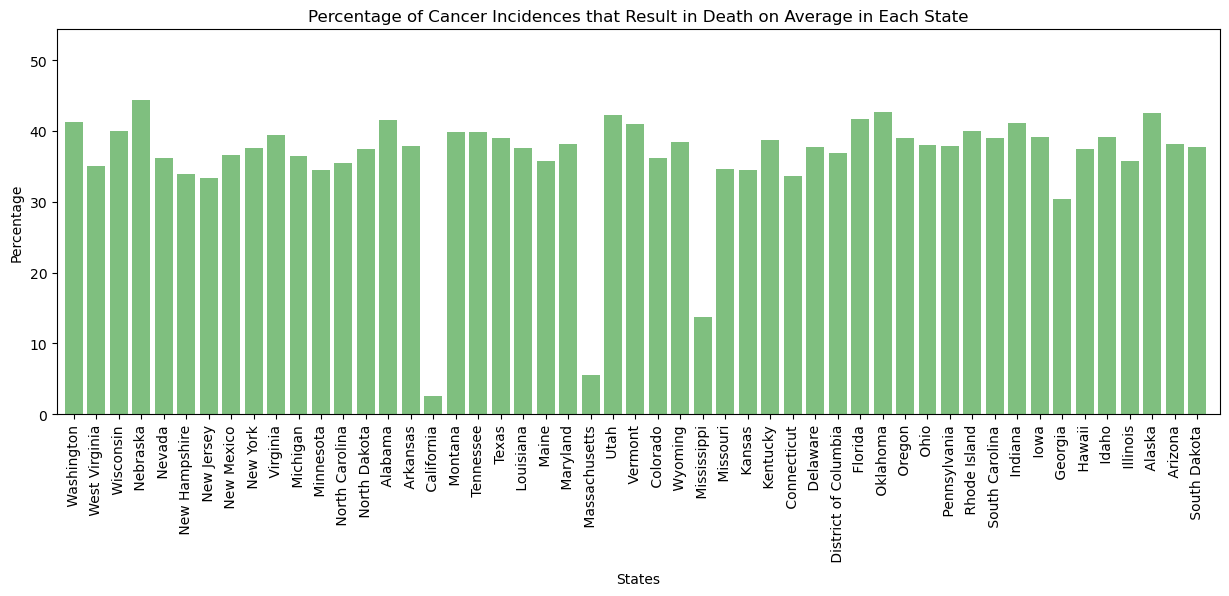

<Figure size 640x480 with 0 Axes>

In [34]:
#Create a bar graph showing the percentages of cancer incidences that result in death by state. 
x_axis = np.arange(len(grouped_cancer_df))
tick_locations = [value for value in x_axis] 
plt.figure(figsize=(15,5))
plt.bar(x_axis,grouped_cancer_df["Percentages"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations,new_df["State"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(grouped_cancer_df["Percentages"])+10)
plt.title("Percentage of Cancer Incidences that Result in Death on Average in Each State")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.show()
plt.savefig("Images/Cancer_by_State.png")

Sammie's Code

In [35]:
#Setting up bins for categories of marriage percentiles and making a copy of the original dataset.
marriage_bins=[20,25,30,35,40,45,50,55,60,65,70,75]
labels=["20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%","60-65%","65-70%","70-75%"]
marriage_df=cancer_df.copy()

In [36]:
#Binning the data by marriage percent.
marriage_df["Percent_of_Population_Married"]=pd.cut(marriage_df["Cancer_Incidence_Count"],marriage_bins,labels=labels)

#Finding the average death rate from cancer and average age of population in each category of marriage percent.
death_rates_by_marriage=marriage_df.groupby(["Percent_of_Population_Married"])["Cancer_Deaths_Percent"].mean()
age_marriage=marriage_df.groupby(["Percent_of_Population_Married"])["Median_Age"].mean()

In [37]:
#Adding the age and death rates from cancer to a dataframe.
death_and_marriage=pd.DataFrame({"Average Cancer Death Rate":death_rates_by_marriage,
                                 "Average Age of Population":age_marriage})

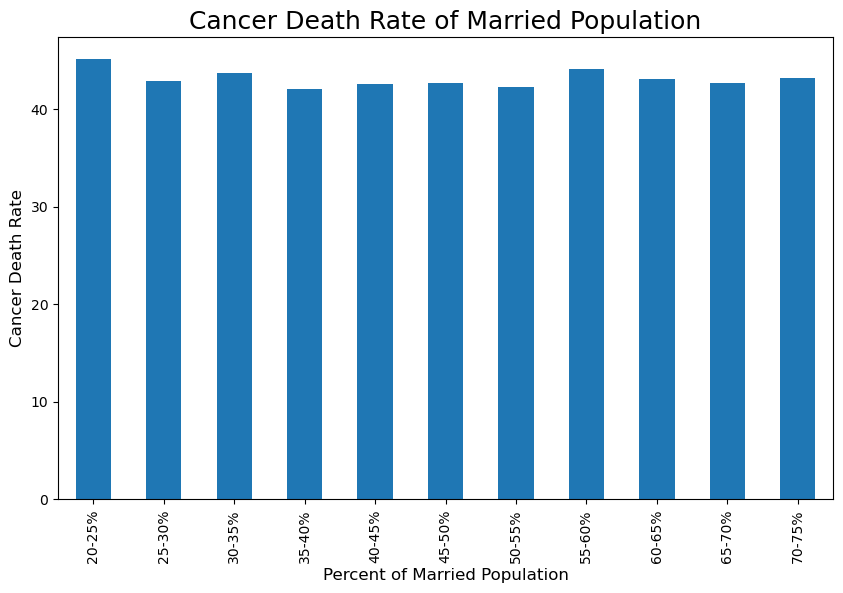

In [38]:
#Plotting a barchart showing the average death rate from cancer for each category of marriage percentage.
death_and_marriage["Average Cancer Death Rate"].plot(kind="bar",figsize=(10,6)) 

#Chart labels
plt.title("Cancer Death Rate of Married Population",fontsize=18) 
plt.xlabel("Percent of Married Population",fontsize=12)
plt.ylabel("Cancer Death Rate",fontsize=12)

#Saving image to folder
plt.savefig("Images/Death_Marriage.png")
plt.show()


Jake's Code

In [39]:
#create new dataframe
insurance_df = cancer_df.loc[:,["State", "Private_Insurance_%", "Public_Insurance_%", "Average_Deaths_per_Year", "Cancer_Deaths_Percent"]]

In [40]:
#rename column names and save them to the dataframe
insurance_df.rename(columns={'Private_Insurance_%': 'Private Insurance Percentage','Public_Insurance_%': 'Public Insurance Percentage', 'Average_Deaths_per_Year': 'Average Deaths per Year', 'Cancer_Deaths_Percent': 'Cancer Deaths Percentage'}, inplace=True)

In [41]:
#find unique values for states
unique_values = insurance_df['State'].unique()

state_df = pd.DataFrame({'State': unique_values})

In [42]:
#Final dataset sorted with unique states and mean
final_df = insurance_df.groupby('State').agg({'Private Insurance Percentage': 'median', 'Public Insurance Percentage': 'median', 'Cancer Deaths Percentage': 'median'}, inplace=True)

In [43]:
final_df['Uninsured'] = (100 - (final_df['Private Insurance Percentage'] + final_df['Public Insurance Percentage'])) * -1

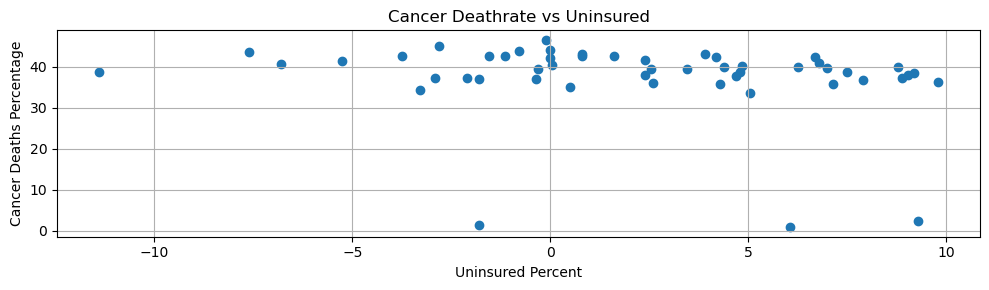

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(10,3))
plt.scatter(final_df['Uninsured'], final_df['Cancer Deaths Percentage'])
plt.xlabel('Uninsured Percent')
plt.ylabel('Cancer Deaths Percentage')
plt.title('Cancer Deathrate vs Uninsured')
plt.grid(True)
plt.tight_layout()
plt.show()

#Saving image to folder
plt.savefig("Images/Insurance.png")